# Fully developed baroclinic instability of a 3-layer flow 

In [1]:
import numpy as np
from numpy import pi
from matplotlib import pyplot as plt

#import pyqg
import sys
sys.path.insert(0, '/home/zl1574/pyqg_test')
from pyqg_multilayer_doc import pyqg

from pyqg import diagnostic_tools as tools

## Set up

In [2]:
L =  1000.e3     # length scale of box    [m]
Ld = 15.e3       # deformation scale      [m]
kd = 1./Ld       # deformation wavenumber [m^-1]
Nx = 64          # number of grid points

H1 = 500.        # layer 1 thickness  [m]
H2 = 1750.       # layer 2 
H3 = 1750.       # layer 3 

U1 = 0.05          # layer 1 zonal velocity [m/s]
U2 = 0.025         # layer 2
U3 = 0.00          # layer 3

rho1 = 1025.
rho2 = 1025.275
rho3 = 1025.640

rek = 1.e-7       # linear bottom drag coeff.  [s^-1]
f0  = 0.0001236812857687059 # coriolis param [s^-1]
beta = 1.2130692965249345e-11 # planetary vorticity gradient [m^-1 s^-1]

Ti = Ld/(abs(U1))  # estimate of most unstable e-folding time scale [s]
dt = Ti/200.   # time-step [s]
tmax = 500*Ti      # simulation time [s]

In [3]:
m = pyqg.LayeredModel(nx=Nx, nz=3, U = [U1,U2,U3],V = [0.,0.,0.],L=L,f=f0,beta=beta,
                         H = [H1,H2,H3], rho=[rho1,rho2,rho3],rek=rek,
                        dt=dt,tmax=tmax, twrite=10000, tavestart=Ti*200)

INFO:  Logger initialized


## Initial condition

In [4]:
sig = 1.e-7
qi = sig*np.vstack([np.random.randn(m.nx,m.ny)[np.newaxis,],
                    np.random.randn(m.nx,m.ny)[np.newaxis,],
                    np.random.randn(m.nx,m.ny)[np.newaxis,]])
m.set_q(qi)

## Run the model

In [5]:
m.run()

INFO: Step: 10000, Time: 1.50e+07, KE: 3.07e-04, CFL: 0.012
INFO: Step: 20000, Time: 3.00e+07, KE: 3.25e-02, CFL: 0.097
INFO: Step: 30000, Time: 4.50e+07, KE: 1.75e-01, CFL: 0.178
INFO: Step: 40000, Time: 6.00e+07, KE: 1.66e-01, CFL: 0.174
INFO: Step: 50000, Time: 7.50e+07, KE: 5.01e-01, CFL: 0.278
INFO: Step: 60000, Time: 9.00e+07, KE: 3.23e-01, CFL: 0.183
INFO: Step: 70000, Time: 1.05e+08, KE: 1.66e-01, CFL: 0.173
INFO: Step: 80000, Time: 1.20e+08, KE: 1.37e-01, CFL: 0.188
INFO: Step: 90000, Time: 1.35e+08, KE: 3.10e-01, CFL: 0.217
INFO: Step: 100000, Time: 1.50e+08, KE: 4.43e-01, CFL: 0.219


## Xarray Dataset ##

Notice that the conversion to an xarray dataset requires xarray to be installed on your machine. See here for installation instructions: http://xarray.pydata.org/en/stable/getting-started-guide/installing.html#instructions

In [6]:
ds = m.to_dataset()
ds

<xarray.Dataset>
Dimensions:          (time: 1, lev: 3, y: 64, x: 64, l: 64, k: 33, lev_mid: 2)
Coordinates:
  * time             (time) float64 1.5e+08
  * lev              (lev) int64 1 2 3
  * lev_mid          (lev_mid) float64 1.5 2.5
  * x                (x) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                (y) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * l                (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * k                (k) float64 0.0 6.283e-06 1.257e-05 ... 0.0001948 0.0002011
Data variables: (12/31)
    q                (time, lev, y, x) float64 -4.276e-06 ... -1.878e-06
    u                (time, lev, y, x) float64 -1.177 -1.202 ... -1.08 -1.127
    v                (time, lev, y, x) float64 1.251 1.183 ... 1.015 1.075
    ufull            (time, lev, y, x) float64 -1.127 -1.152 ... -1.08 -1.127
    vfull            (time, lev, y, x) float64 1.251 1.183 ... 1.015 1.075
    qh               (time, lev, l, k) complex128 (4.613991721328663e-06+0j) ...
    ...               ...
    KEflux_div       (time, l, k) float64 0.0 0.06648 ... 2.623e-17 5.508e-22
    APEflux_div      (time, l, k) float64 0.0 -0.2173 ... 7.459e-18 2e-22
    APEgenspec       (time, l, k) float64 0.0 0.2167 ... -1.727e-34 -5.656e-43
    ENSflux          (time, l, k) float64 0.0 -1.611e-09 ... 1.637e-24 3.84e-29
    ENSgenspec       (time, l, k) float64 0.0 1.611e-09 ... 2.196e-42 -7.086e-51
    ENSfrictionspec  (time, l, k) float64 0.0 5.146e-12 ... -1.133e-49
Attributes: (12/24)
    pyqg:beta:       1.2130692965249345e-11
    pyqg:delta:      None
    pyqg:dt:         1500.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    pyqg:M:          4096
    ...              ...
    pyqg:tc:         100000
    pyqg:tmax:       150000000.0
    pyqg:twrite:     10000
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

## Snapshots

In [7]:
PV = ds.q + ds.Qy * ds.y
PV['x'] = ds.x/ds.attrs['pyqg:rd']; PV.x.attrs = {'long_name': r'$x/L_d$'}
PV['y'] = ds.y/ds.attrs['pyqg:rd']; PV.y.attrs = {'long_name': r'$y/L_d$'}

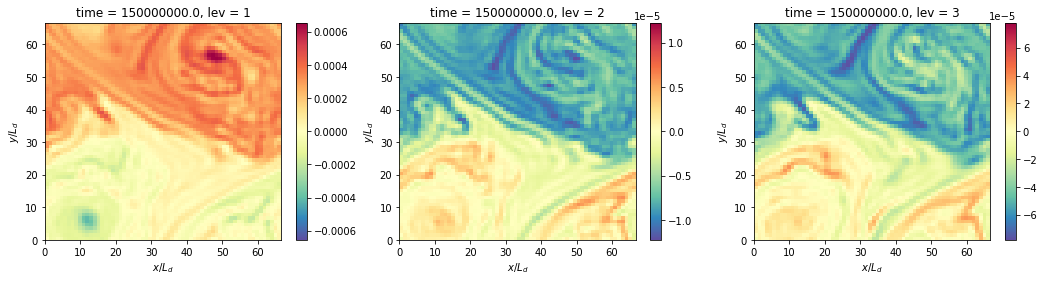

In [8]:
plt.figure(figsize=(18,4))

plt.subplot(131)
PV.sel(lev=1).plot(cmap='Spectral_r')

plt.subplot(132)
PV.sel(lev=2).plot(cmap='Spectral_r')

plt.subplot(133)
PV.sel(lev=3).plot(cmap='Spectral_r');

pyqg has a built-in method that computes the vertical modes. It is stored as an attribute in the Dataset.

In [9]:
print(f"The first baroclinic deformation radius is {ds.attrs['pyqg:radii'][1]/1.e3} km")
print(f"The second baroclinic deformation radius is {ds.attrs['pyqg:radii'][2]/1.e3} km")

The first baroclinic deformation radius is 15.375382785987185 km
The second baroclinic deformation radius is 7.975516271996243 km


We can project the solution onto the modes

In [10]:
pn = m.modal_projection(m.p)

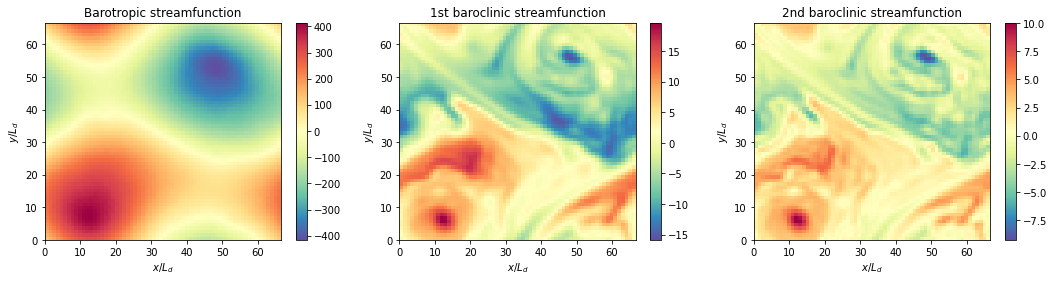

In [11]:
plt.figure(figsize=(18,4))

plt.subplot(131)
plt.pcolormesh(m.x/m.rd, m.y/m.rd, pn[0]/(U1*Ld), cmap='Spectral_r', shading='auto')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Barotropic streamfunction')

plt.subplot(132)
plt.pcolormesh(m.x/m.rd, m.y/m.rd, pn[1]/(U1*Ld), cmap='Spectral_r', shading='auto')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('1st baroclinic streamfunction')

plt.subplot(133)
plt.pcolormesh(m.x/m.rd, m.y/m.rd, pn[2]/(U1*Ld), cmap='Spectral_r', shading='auto')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('2nd baroclinic streamfunction');

## Diagnostics

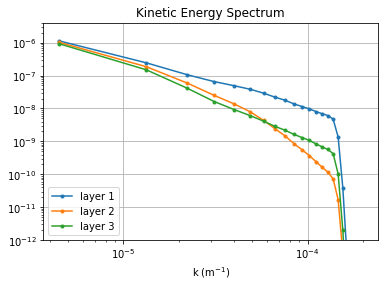

In [12]:
kr, kespec_1 = tools.calc_ispec(m, ds.KEspec.sel(lev=1).data.squeeze())
_ , kespec_2 = tools.calc_ispec(m, ds.KEspec.sel(lev=2).data.squeeze())
_ , kespec_3 = tools.calc_ispec(m, ds.KEspec.sel(lev=3).data.squeeze())

plt.loglog(kr, kespec_1, '.-' )
plt.loglog(kr, kespec_2, '.-' )
plt.loglog(kr, kespec_3, '.-' )

plt.legend(['layer 1','layer 2', 'layer 3'], loc='lower left')
plt.ylim([1e-12,4e-6]); 
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Kinetic Energy Spectrum');

By default the modal KE and PE spectra are also calculated

In [13]:
kr, modal_kespec_1 = tools.calc_ispec(m, ds.KEspec_modal.sel(lev=1).data.squeeze())
_,  modal_kespec_2 = tools.calc_ispec(m, ds.KEspec_modal.sel(lev=2).data.squeeze())
_,  modal_kespec_3 = tools.calc_ispec(m, ds.KEspec_modal.sel(lev=3).data.squeeze())

_,  modal_pespec_2 = tools.calc_ispec(m, ds.PEspec_modal.sel(lev_mid=1.5).data.squeeze())
_,  modal_pespec_3 = tools.calc_ispec(m, ds.PEspec_modal.sel(lev_mid=2.5).data.squeeze())

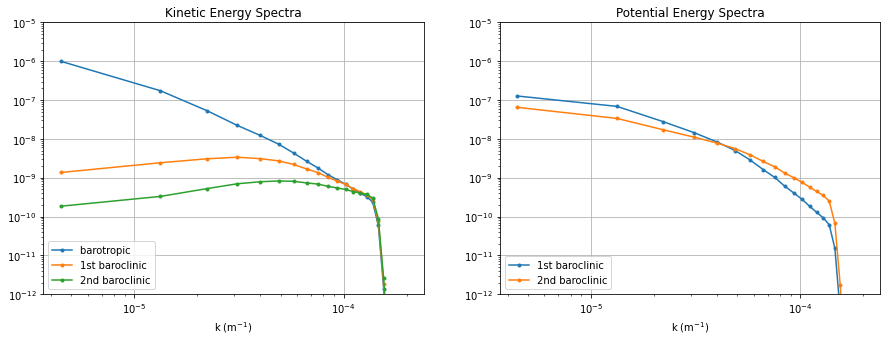

In [14]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.loglog(kr, modal_kespec_1, '.-')
plt.loglog(kr, modal_kespec_2, '.-')
plt.loglog(kr, modal_kespec_3, '.-')

plt.legend(['barotropic ','1st baroclinic', '2nd baroclinic'], loc='lower left')
plt.ylim([1e-12,1e-5]); 
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Kinetic Energy Spectra');


plt.subplot(122)
plt.loglog(kr, modal_pespec_2, '.-')
plt.loglog(kr, modal_pespec_3, '.-')

plt.legend(['1st baroclinic', '2nd baroclinic'], loc='lower left')
plt.ylim([1e-12,1e-5]); 
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Potential Energy Spectra');

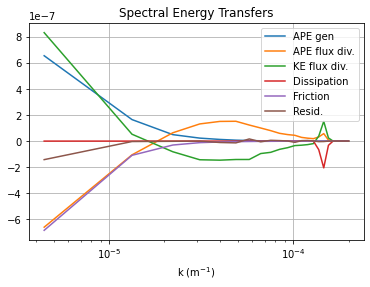

In [15]:
_, APEgenspec = tools.calc_ispec(m, ds.APEgenspec.data.squeeze())
_, APEflux    = tools.calc_ispec(m, ds.APEflux_div.data.squeeze())
_, KEflux     = tools.calc_ispec(m, ds.KEflux_div.data.squeeze())
_, Dissspec   = tools.calc_ispec(m, ds.Dissspec.squeeze().data)
_, KEfrictionspec = tools.calc_ispec(m, ds.KEfrictionspec.squeeze().data)

ebud = [ APEgenspec,
         APEflux,
         KEflux,
         Dissspec, 
         KEfrictionspec]
ebud.append(-np.vstack(ebud).sum(axis=0))
ebud_labels = ['APE gen','APE flux div.','KE flux div.','Dissipation','Friction','Resid.']
[plt.semilogx(kr, term) for term in ebud]
plt.legend(ebud_labels, loc='upper right')
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Spectral Energy Transfers');

The dynamics here is similar to the reference experiment of [Larichev & Held (1995)](http://journals.ametsoc.org/doi/pdf/10.1175/1520-0485%281995%29025%3C2285%3AEAAFIA%3E2.0.CO%3B2). The APE generated through baroclinic instability is fluxed towards deformation length scales, where it is converted into KE. The KE the  experiments and inverse tranfer, cascading up to the scale of the domain. The mechanical bottom drag essentially removes the large scale KE.  